# 011 Probability bug Hunt

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.0


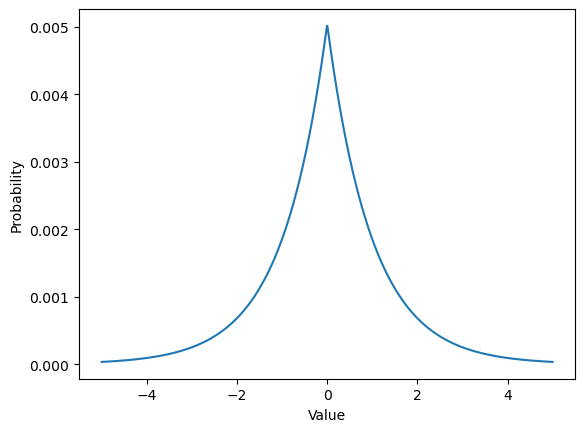

In [41]:
# 1.) Show the laplace probability distribution
x = np.linspace(-5,5,1000)
data = np.exp(-np.abs(x))
data = data / np.sum(data)

print(np.sum(data))

plt.plot(x,data)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

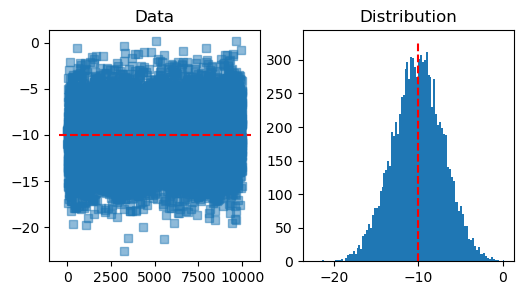

In [42]:
# 2.) Shifted/stretched normal distribution

shift = -10
stretch = 3
n = 10000

pnts = np.random.randn(n)*stretch + shift

fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(pnts,'s', alpha=.5)
xlim = ax[0].get_xlim()
ax[0].plot(xlim,[shift,shift],'r--')
ax[0].set_title('Data')

ax[1].hist(pnts,100)
ylim = ax[1].get_ylim()
ax[1].plot([shift,shift], ylim,'r--')
ax[1].set_title('Distribution')

plt.show()



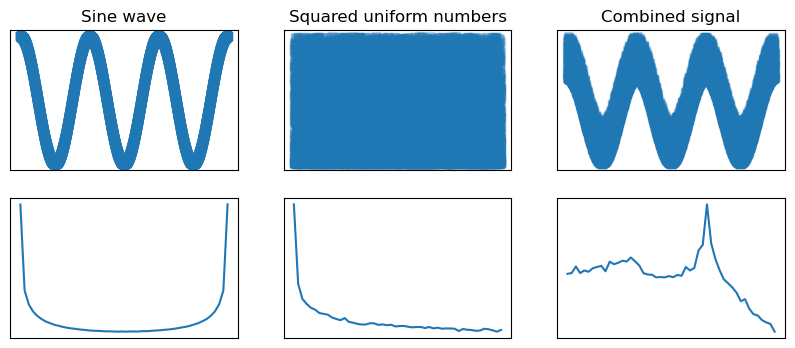

In [43]:
# 2.) Generate data from various distributions, then sum


n = 20000

sig1 = np.cos(np.linspace(0,6*np.pi,n))
sig2 = np.random.rand(n)**2
sig2 = sig2 - np.mean(sig2)

signal = sig1 + sig2

# get probability distributions
hd1 = np.histogram(sig1,50)
hd2 = np.histogram(sig2,50)
hd3 = np.histogram(sig1+sig2,50)


# plot the two individual features and their distributions
fig,ax = plt.subplots(2,3,figsize=(10,4))

ax[0,0].plot(sig1,'s',alpha=.2)
ax[0,0].set_title('Sine wave')
ax[1,0].plot(hd1[1][:-1],hd1[0])

ax[0,1].plot(sig2,'s',alpha=.2)
ax[0,1].set_title('Squared uniform numbers')
ax[1,1].plot(hd2[1][:-1],hd2[0])

ax[0,2].plot(signal,'s',alpha=.2)
ax[0,2].set_title('Combined signal')
ax[1,2].plot(hd1[1][:-1],hd3[0])

for i in np.matrix.flatten(ax):
    i.set_yticks([])
    i.set_xticks([])

plt.show()



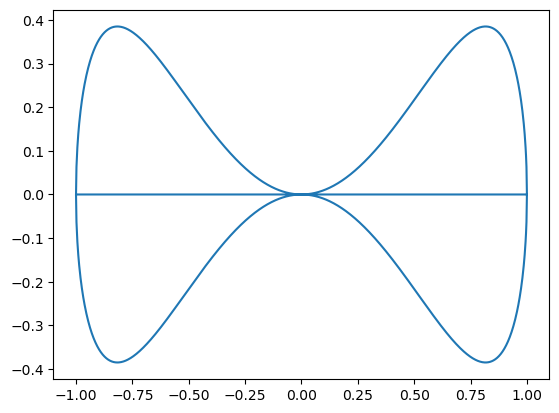

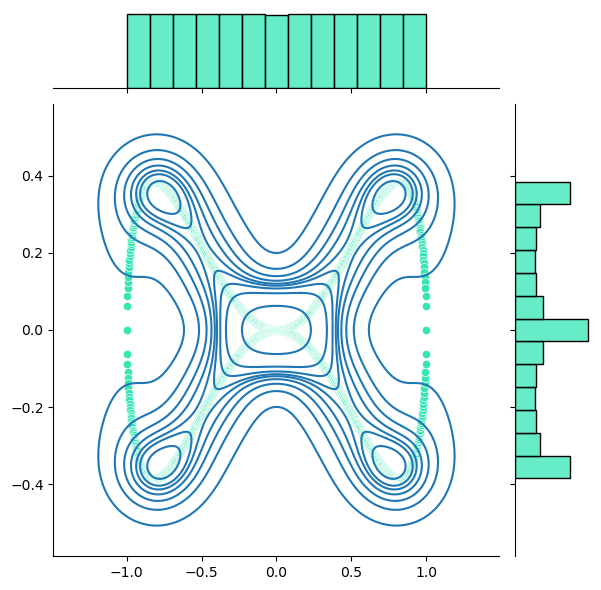

In [44]:
# 3.) "Dumbbell curve"
n = 1000
x = np.linspace(-1,1,n)

y = np.append( x**2 * np.sqrt(1-x**2), -x**2 * np.sqrt(1-x**2) )
xx = np.append(x,x)

plt.plot(xx,y)
plt.show()

sns.jointplot(x=xx,y=y,kind='scatter',color=[.2,.9,.7]).plot_joint(sns.kdeplot)
plt.show()